In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tqdm import tqdm

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [ ]:
import glob

# Load targets

In [ ]:
all_papers = pd.read_csv('/content/drive/MyDrive/master_thesis/dataset_data/end_to_end/10k_papers_eval.csv')

In [ ]:
def get_precision_recall_at_k(k, data):
  all_relevant = data[(data['type'] == 'associated_paper')]
  k_data = data.iloc[:k]
  k_relevant = k_data[(k_data['type'] == 'associated_paper')]
  precision = len(k_relevant) / k
  recall = len(k_relevant)/ len(all_relevant)
  return precision, recall

def evaluate_case_data(case_id, case_results):
  sorted_case_data = case_results.sort_values(by='similarity', ascending=False)
  ks = [5, 10, 100, 500, 1000, 5000, 10000]
  results = {'case_id': case_id}
  for k in ks:
    p, r = get_precision_recall_at_k(k, sorted_case_data)
    results[f"top-{k}-precision"] = p
    results[f"top-{k}-recall"] = r
  return results

In [ ]:
def eval():
  res = []
  # eval results for every case
  for f in glob.glob("/content/drive/MyDrive/master_thesis/eval_data/10k_full_eval/*.csv"):
    case_data = pd.read_csv(f)
    case_id = case_data.iloc[0]['case_id']
    paper_targets = all_papers[all_papers['case_id'] == case_id][['paper_id', 'type']]
    case_data_with_targets = pd.merge(case_data, paper_targets, left_on='paper_id', right_on='paper_id')
    res.append(evaluate_case_data(case_id, case_data_with_targets))
  return pd.DataFrame.from_records(res)

In [ ]:
results = eval()

# Plot results

In [ ]:
plottable_data = []
for k in [5, 10, 100, 500, 1000, 5000, 10000]:
  for t in ['recall', 'precision']:
    r = results[['case_id', f'top-{k}-{t}']].rename(columns={f'top-{k}-{t}': 'value'})
    r['type'] = t
    r['k'] = k
    plottable_data.append(r)

In [ ]:
plottable_df = pd.concat(plottable_data)

In [ ]:
plottable_df.reset_index(inplace=True, drop=True)

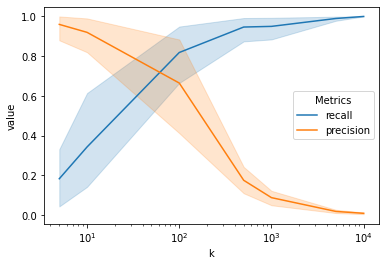

In [ ]:
g = sns.lineplot(data=plottable_df, x="k", y="value", hue="type")
g.set(xscale='log')
g.legend(title='Metrics')